In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
data=pd.read_csv('/content/customer_churn_spend_dataset.csv')
data

,Gender,Age,Location,Membership,Tenure,MonthlySpend,Churn
0,Male,38,Tamale,Gold,1,457.41,1
1,Female,49,Kumasi,Gold,2,560.18,0
2,Male,40,Takoradi,Gold,8,574.95,0
3,Male,50,Accra,Silver,3,305.54,0
4,Male,20,Kumasi,Gold,10,672.41,0
...,...,...,...,...,...,...,...
495,Male,35,Tamale,Silver,10,688.56,0
496,Male,47,Takoradi,Gold,7,272.23,1
497,Female,32,Tamale,Gold,6,686.58,0
498,Male,44,Accra,Gold,6,484.55,0


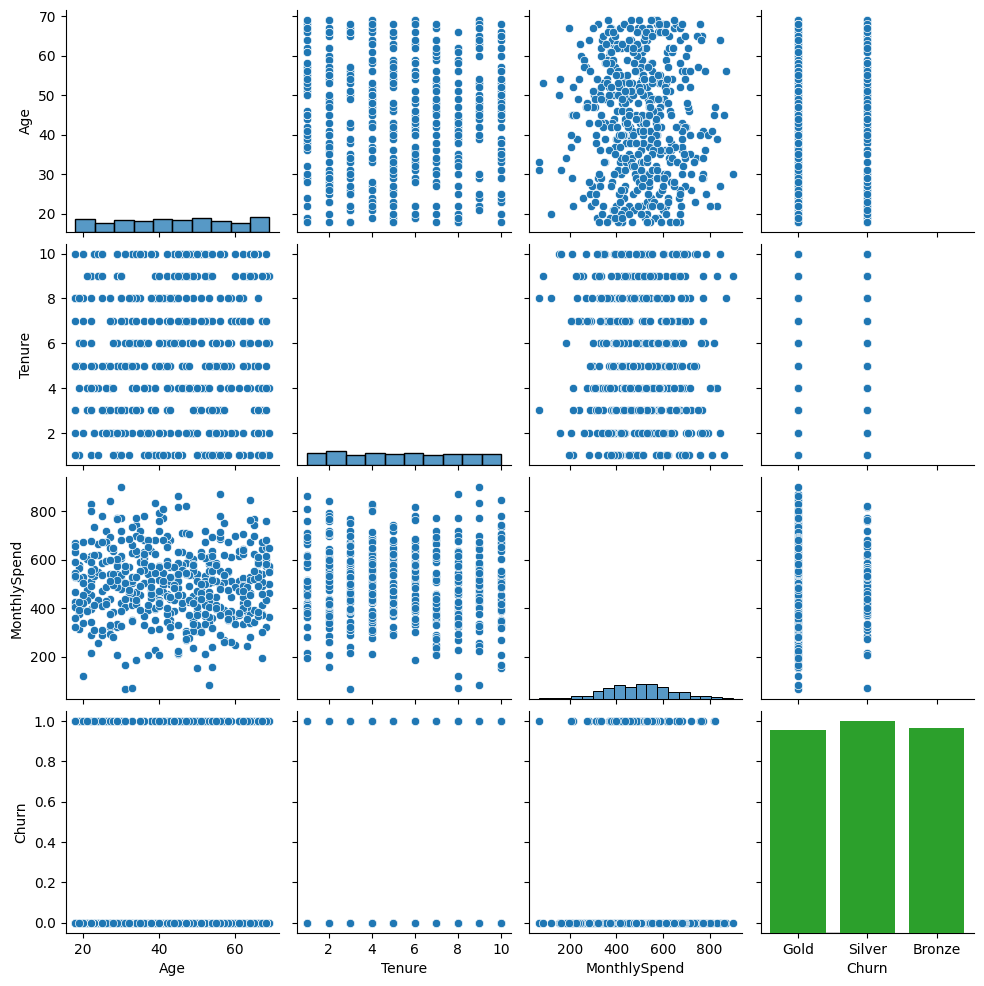

In [4]:
#visualize to knownrelationships
sns.pairplot(data)
plt.scatter(data['MonthlySpend'],data['Age'])
plt.bar(data['Membership'],data['MonthlySpend'])
plt.show()

In [5]:
#one hot encoding for features for regression
y=data['MonthlySpend']
X=data.drop(['MonthlySpend'],axis=1)
# Fit and transform the categorical columns
encoder=OneHotEncoder(drop='first',sparse_output=False)
X_encoded=encoder.fit_transform(X[['Gender','Location','Membership']])
# Create a DataFrame for the new one-hot columns
encoded_cols = encoder.get_feature_names_out(['Gender','Location','Membership'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols)
#drop the original feature
X=X.drop(['Gender','Location','Membership'],axis=1)
# Concatenate the new one-hot encoded columns with X
X_final = pd.concat([X.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)




In [6]:
#predicting monthly spend
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.20,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

-0.011581669154992147

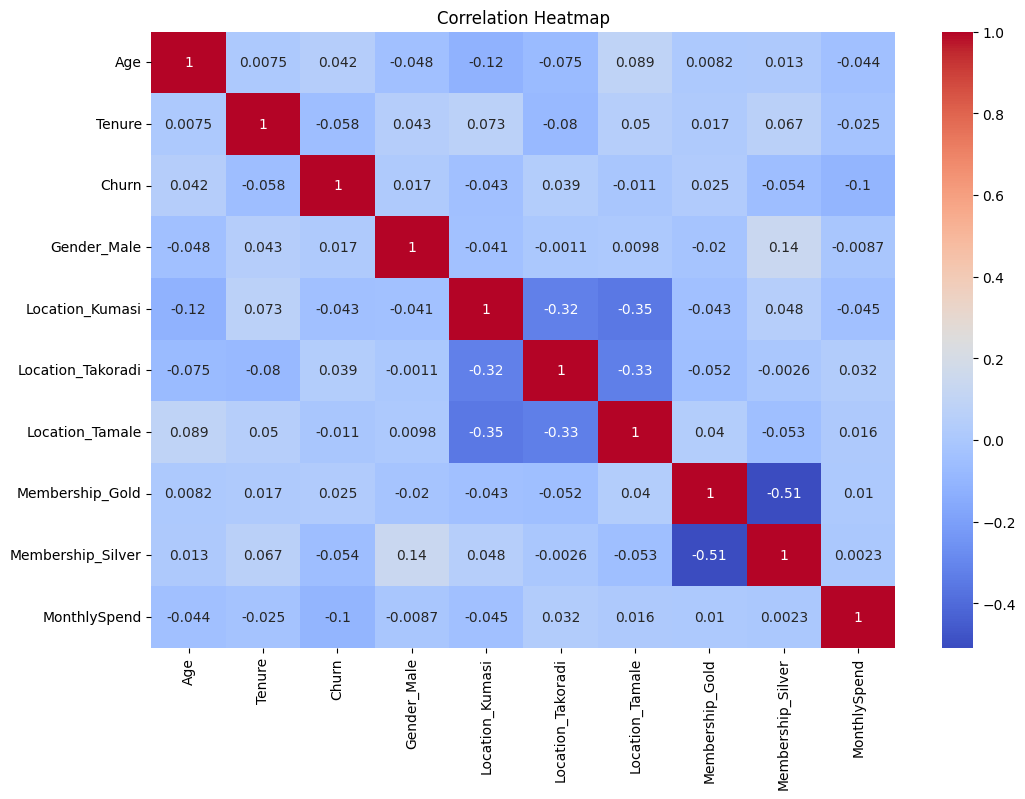

In [7]:
# Combine your features and target temporarily
df_check = X_final.copy()
df_check['MonthlySpend'] = y

# Compute correlation matrix
corr = df_check.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()
#the negative score is from the dataset used

In [8]:
X_final.dtypes

,0
Age,int64
Tenure,int64
Churn,int64
Gender_Male,float64
Location_Kumasi,float64
Location_Takoradi,float64
Location_Tamale,float64
Membership_Gold,float64
Membership_Silver,float64


In [9]:
#The model score is negative let's try scaling to see if it can be corrected
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Importing train_test_split

# Assuming X_final and y are already defined from previous cells
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42) # Splitting the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test) # Evaluate the model on the scaled test data

-0.011581669154992369

In [10]:
#The prediction of churn was not a problem but with monthly spend, the model score was negative which isn't good
#i try to find out from their correlation and realized it has weak correlation with all the features
#I thought it might be from the encoding but found the dtypes was correct
#I scaled it but still didn't get desired results
#In conclusion, it is from the dataset so I should considering adding other features to the dataset

In [11]:
#one hot encoding for features for logistic regression
y_log=data['Churn']
X_log=data.drop(['Churn'],axis=1)
# Fit and transform the categorical columns
encoderr=OneHotEncoder(drop='first',sparse_output=False)
X_enconded=encoderr.fit_transform(X_log[['Gender','Location','Membership']])
# Create a DataFrame for the new one-hot columns
encoded_colss = encoderr.get_feature_names_out(['Gender','Location','Membership'])
X_enconded_df = pd.DataFrame(X_enconded, columns=encoded_colss)
#drop the original feature
X=X_log.drop(['Gender','Location','Membership'],axis=1)
# Concatenate the new one-hot encoded columns with X
X_finals = pd.concat([X.reset_index(drop=True), X_enconded_df.reset_index(drop=True)], axis=1)

In [12]:
#logistic Regression to predict churn
X_train,X_test,y_train,y_test=train_test_split(X_finals,y_log,test_size=0.20,random_state=42)
model=LogisticRegression(max_iter=500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.81